<a href="https://colab.research.google.com/github/Aleksandr-gitt/ControlWork/blob/main/LEKCIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Изображаем статистические отношения**

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/sample_data/california_housing_test.csv')

**Scatterplot** (Точечный график)
Математическая диаграмма, изображающая значения двух переменных в виде
точек на декартовой плоскости. Библиотека seaborn без труда принимает pandas
DataFrame(таблицу). Чтобы изобразить отношения между двумя столбцами
достаточно указать, какой столбец отобразить по оси x, а какой по оси y.
Для того чтобы начать работу с библиотекой seaborn, ее необходимо импортировать
к себе в программу:

In [5]:
import seaborn as sns

Вернемся к нашей таблице. Можно заметить, что дома расположены в
определенной "полосе" долготы и широты.

**Изображение точек долготы по отношению к широте:**

<Axes: xlabel='longitude', ylabel='latitude'>

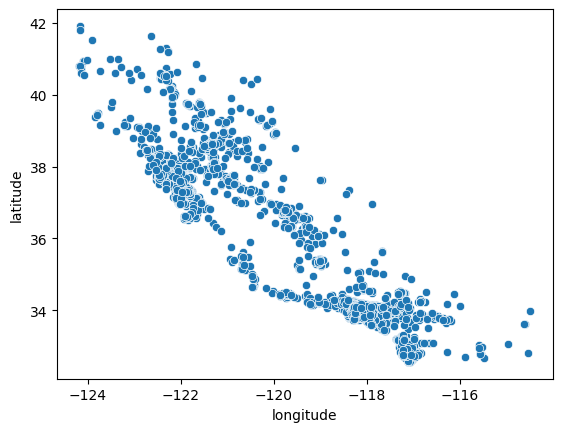

In [6]:
sns.scatterplot(data=df, x="longitude", y="latitude")

Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с
помощью цвета. В данном случае опять же достаточно очевидное отношение, чем
выше кол-во семей, тем выше кол-во людей и соответственно комнат.

<Axes: xlabel='households', ylabel='population'>

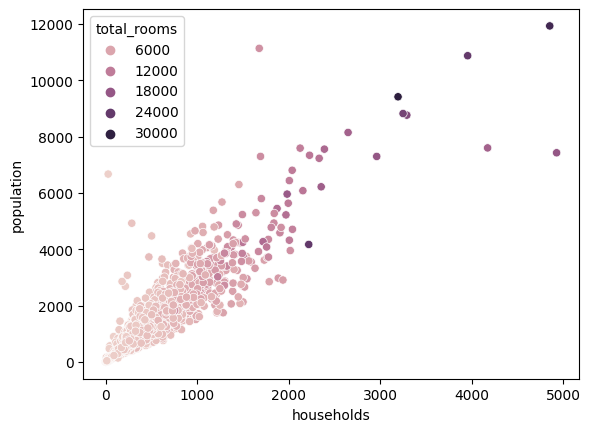

In [7]:
sns.scatterplot(data=df, x="households", y="population", hue="total_rooms")

Помимо обозначения дополнительного измерения цветом мы можем использовать
**size**.

<Axes: xlabel='households', ylabel='population'>

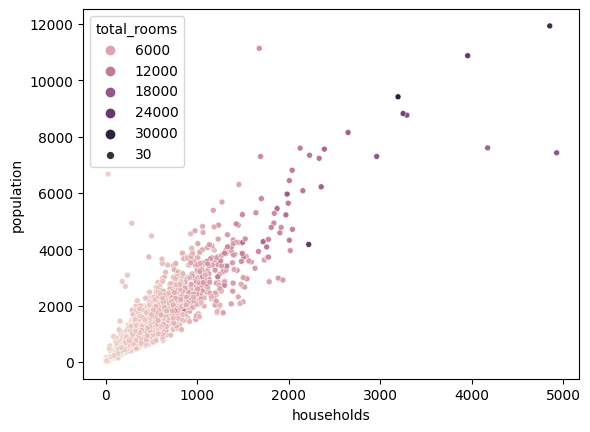

In [10]:
sns.scatterplot(data=df, x="households", y="population", hue="total_rooms",size=30)

Мы можем визуализировать сразу несколько отношений, используя класс **PairGrid**
внутри **seaborn**. **PairGrid** принимает как аргумент pandas **DataFrame** и
визуализирует все возможные отношения между ними, в соответствии с
выбранным типом графика.

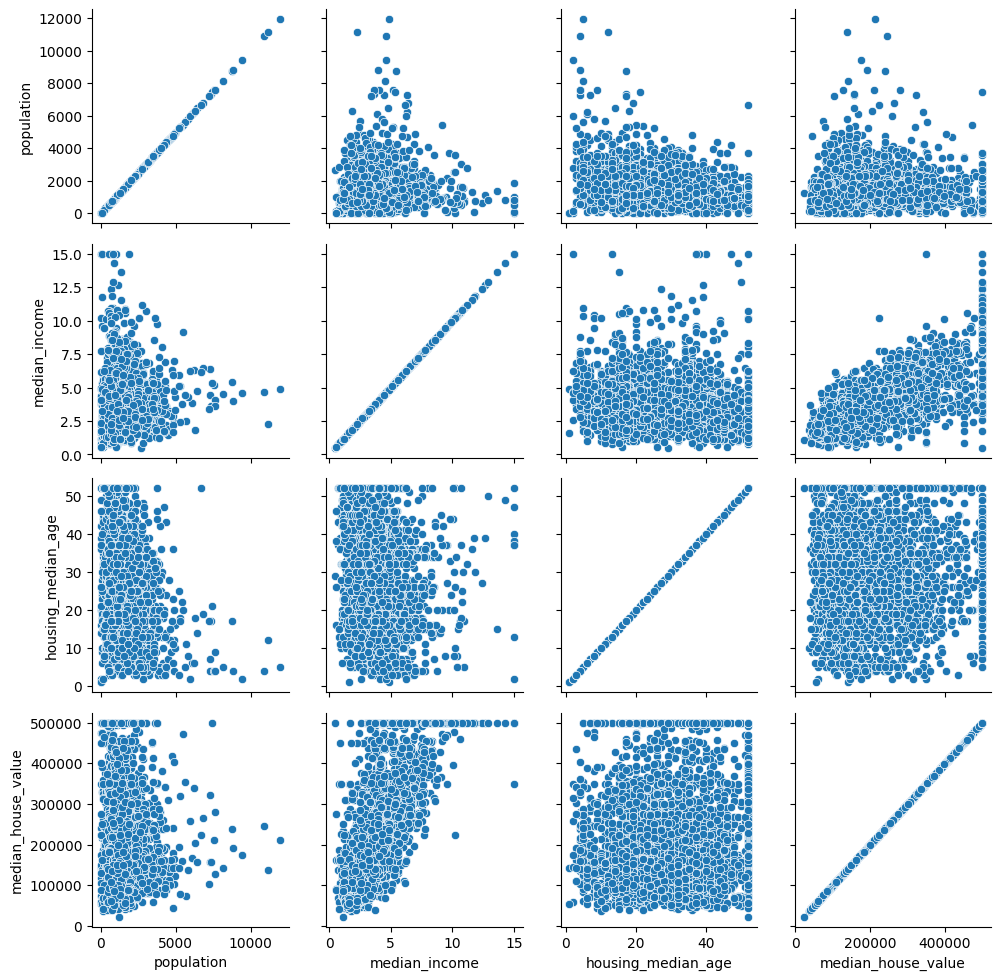

In [12]:
cols = ['population', 'median_income', 'housing_median_age','median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

***Линейные графики***

Хорошо подойдут, если есть временная или какая-либо иная последовательность и
значения, которые могут меняться в зависимости от нее. Для генерации линейных
графиков в **seaborn** используется **relplot** функцию. Она также принимает
**DataFrame**, x, y - столбцы.
Для визуализации выбирается тип **line**:

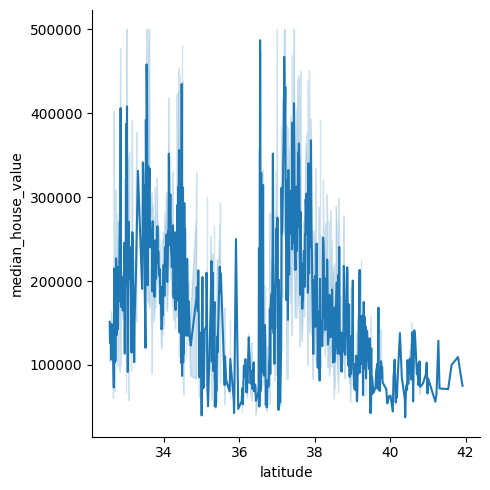

In [13]:
sns.relplot(x="latitude", y="median_house_value", kind="line", data=df)

Можно видеть, что в определенных местах долготы цена за дома резко
подскакивает.
Попробуем визуализировать longitude по отношения к median_house_value и поймем
в чем же дело, почему цена так резко подскакивает.

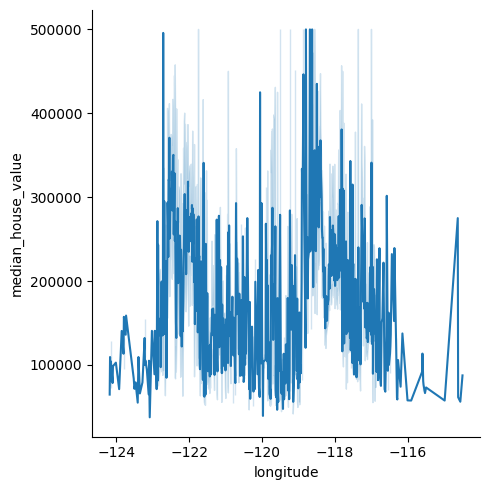

In [14]:
sns.relplot(x = 'longitude', y = 'median_house_value', kind = 'line', data = df)

Можно видеть, что в определенных местах широты цена за дома также очень
высока.
Используя точечный график можно визуализировать эти отношения с большей
четкостью. Скорее всего резкий рост цен связан с близостью к ценному объекту,
повышающему качество жизни, скорее всего побережью океана или реки.

<Axes: xlabel='latitude', ylabel='longitude'>

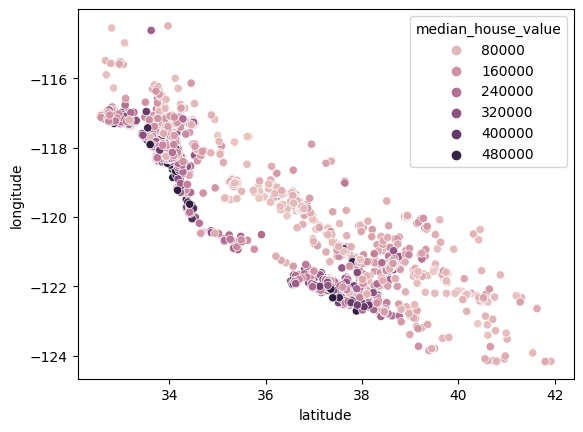

In [15]:
sns.scatterplot(data=df, x="latitude", y="longitude", hue="median_house_value")

***Гистограмма***

Способ представления табличных данных в графическом виде — в виде столбчатой
диаграммы. По оси x обычно указывают значение, а по оси y - встречаемость(кол-во
таких значений в выборке)

<Axes: xlabel='median_income', ylabel='Count'>

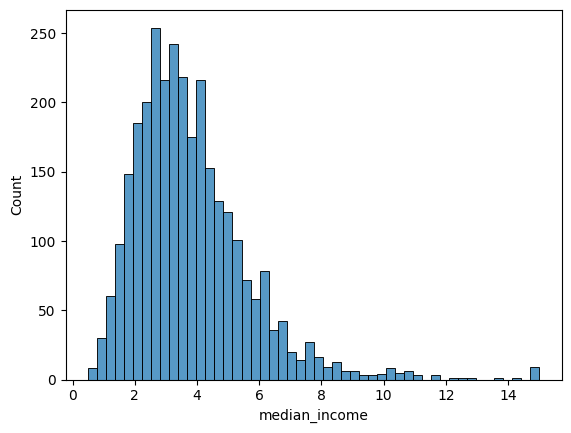

In [16]:
sns.histplot(data=df, x="median_income")

Можно видеть что у большинства семей доход находится между значениями 2 и 6. И
только очень небольшое количество людей обладают доходом > 10.
Изобразим гистограмму по **housing_median_age**.

<Axes: xlabel='housing_median_age', ylabel='Count'>

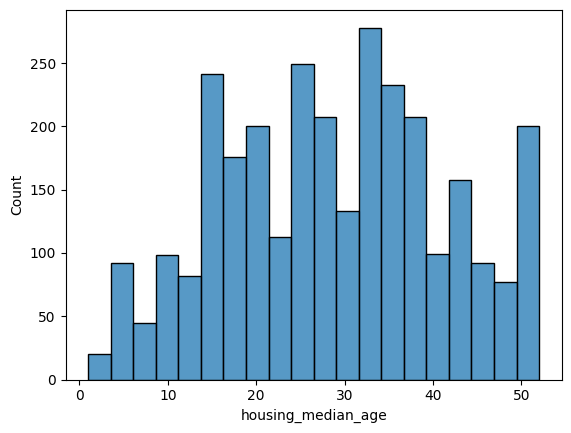

In [17]:
sns.histplot(data = df, x = 'housing_median_age')

Распределение по возрасту более равномерное. Большую часть жителей
составляют люди в возрасте от 20 до 40 лет. Но и молодежи не мало. Также очень
много пожилых людей > 50 лет медианный возраст.
Давайте посмотрим медианный доход у пожилых жителей.

<Axes: xlabel='median_income', ylabel='Count'>

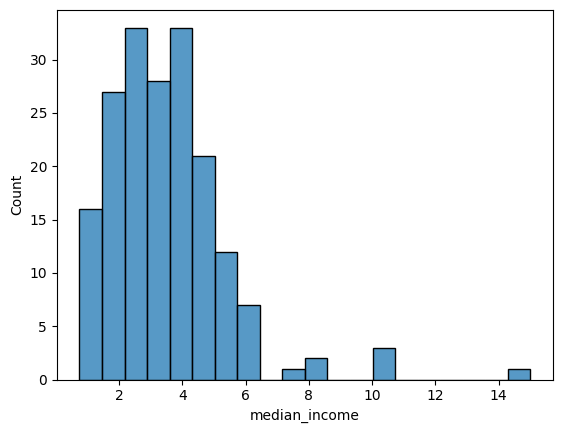

In [18]:
sns.histplot(data=df[df['housing_median_age']>50], x="median_income")

Большого отличия от популяции в целом не наблюдается. Скорее всего это местные
жители.


Давайте разобьем возрастные группы на 3 категории те кто моложе 20 лет, от 20 до
50 и от 50, чтобы посмотреть влияет ли это на доход.

In [19]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50),
'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

Что в этом случае происходит внутри таблицы? Добавился новый столбец
**age_group**, в котором будет указана соответствующая категория.

Применим **group_by**, чтобы получить среднее значение.

<Axes: xlabel='age_group'>

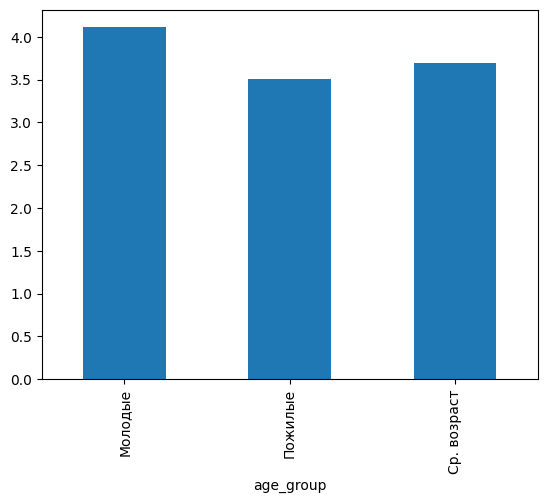

In [20]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')

Молодые оказываются самой богатой группой населения. Но отличие в доходе не
значительное.

**Seaborn** так же позволяет нам смотреть распределение по многим параметрам.
Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6 и те у
кого меньше. Изобразим дополнительное измерение с помощью оттенка в виде
возрастных групп и групп по доходам.

In [21]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'

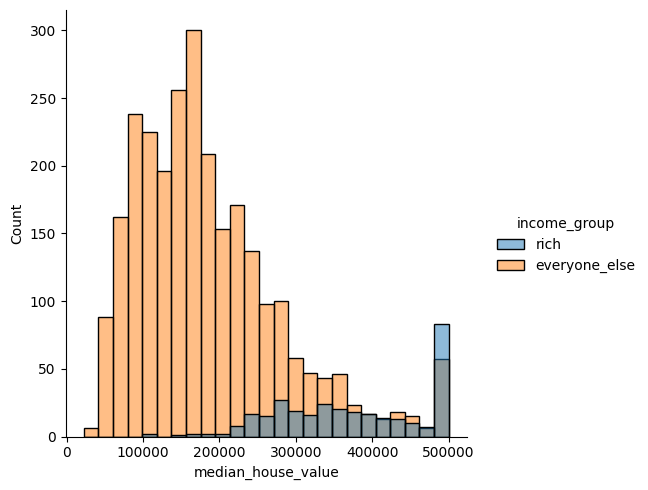

In [22]:
sns.displot(df, x="median_house_value", hue="income_group")




**Итоги:**

Анализ данных должен предоставлять информацию и инсайт, которые не видны
невооруженным взглядом. В этом и есть красота аналитики. В данном случае можно
сделать следующий выводы. Стоимость домов напрямую зависит от их
расположения, в определенной полосе(скорее всего побережье) цена на дома
высокая. Чем выше доход, тем больше шанс, что человек проживает в богатом
районе. Распределение по возрастам примерно одинаковое во всех группах
доходов. Ну и очевидно чем больше людей, тем больше семей, и соответственно
комнат и спален.